In [1]:
# 可视化显示魔术命令
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 用 pandas 读取 csv 文件，加载到数据框（DataFrame）
raw_passengers_df = pd.read_csv('titanic-data.csv')
# 原始数据预览
raw_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 深拷贝，创建新数据框，用于后续数据预处理及数据探索分析
passengers_df = raw_passengers_df.copy()

In [7]:
passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


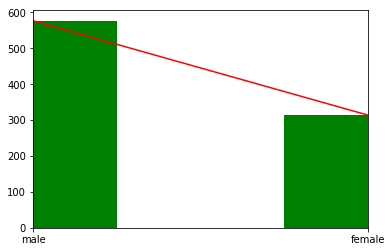

In [25]:
passengers_df['Sex'].value_counts().plot(kind='bar',color='green')
passengers_df['Sex'].value_counts().plot(color='red')

In [34]:
# 数据预处理用的自定义函数
# 年龄分段
def age_to_group(age):
    if age >= 70:
        return '70+'
    elif age >= 60:
        return '60+'
    elif age >= 50:
        return '50+'
    elif age >= 40:
        return '40+'
    elif age >= 30:
        return '30+'
    elif age >= 20:
        return '20+'
    elif age >= 10:
        return '10+'
    elif age >= 0:
        return '0+'
    else:
        return '未知'

# 年龄分段改进，对年龄缺失的部分乘客按称谓做年龄分段
def age_to_group_fix(age_name_df):
    if age_name_df['Age'] >= 70:
        return '70+'
    elif age_name_df['Age'] >= 60:
        return '60+'
    elif age_name_df['Age'] >= 50:
        return '50+'
    elif age_name_df['Age'] >= 40:
        return '40+'
    elif age_name_df['Age'] >= 30:
        return '30+'
    elif age_name_df['Age'] >= 20:
        return '20+'
    elif age_name_df['Age'] >= 10:
        return '10+'
    elif age_name_df['Age'] >= 0:
        return '0+'
    elif 'Master'in age_name_df['Name']: # Master 称谓的乘客平均年龄是 4.574167
        return '0+'
    elif 'Miss'in age_name_df['Name']: # Miss 称谓的乘客平均年龄是 21.773973
        return '20+'
    else:
        return '未知'

# 性别的中文名称，便于可视化展示
def sex_to_chn(sex):
    if sex == 'male':
        return '男性'
    elif sex == 'female':
        return '女性'
    else:
        return '未知'

# 性别的有序编码，便于计算
def sex_to_code(sex):
    if sex == 'male':
        return 0
    elif sex == 'female':
        return 1
    else:
        return -1

# 船舱等级的中文名称，便于可视化展示
def pclass_to_chn(pclass):
    if pclass == 1:
        return '头等舱'
    elif pclass == 2:
        return '二等舱'
    elif pclass == 3:
        return '三等舱'
    else:
        return '未知'

# 船舱等级的有序编码，便于计算
def pclass_to_code(pclass):
    if pclass == 1:
        return 2
    elif pclass == 2:
        return 1
    elif pclass == 3:
        return 0
    else:
        return -1

# 幸存与否的中文名称，便于可视化展示
def survived_to_chn(survived):
    if survived == 0:
        return '遇难者'
    elif survived == 1:
        return '幸存者'
    else:
        return '未知'

In [28]:
passengers_df.insert(4,'SexCode',passengers_df['Sex'].apply(sex_to_code))

In [29]:
passengers_df.head()

,PassengerId,Survived,Pclass,Name,SexCode,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
passengers_df.drop(['SexCode'], axis=1, inplace=True)

In [32]:
passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
passengers_df.insert(5,'SexCode',passengers_df['Sex'].apply(sex_to_code))
passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SexCode,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,35.0,0,0,373450,8.0500,NaN,S


In [36]:
passengers_df.insert(8,'年龄段',passengers_df['Age'].apply(age_to_group))
passengers_df.insert(8,'年龄段_改进后',passengers_df[['Age', 'Name']].apply(age_to_group_fix, axis=1))
passengers_df.insert(6,'性别',passengers_df['Sex'].apply(sex_to_chn))
passengers_df.insert(3,'船舱等级',passengers_df['Pclass'].apply(pclass_to_chn))
passengers_df.insert(3,'PclassCode',passengers_df['Pclass'].apply(pclass_to_code))
passengers_df.insert(2,'是否幸存',passengers_df['Survived'].apply(survived_to_chn))

In [37]:
passengers_df.head()

,PassengerId,Survived,是否幸存,Pclass,PclassCode,船舱等级,Name,Sex,SexCode,性别,Age,SibSp,年龄段_改进后,年龄段,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,遇难者,3,0,三等舱,"Braund, Mr. Owen Harris",male,0,男性,22.0,1,20+,20+,0,A/5 21171,7.2500,NaN,S
1,2,1,幸存者,1,2,头等舱,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,女性,38.0,1,30+,30+,0,PC 17599,71.2833,C85,C
2,3,1,幸存者,3,0,三等舱,"Heikkinen, Miss. Laina",female,1,女性,26.0,0,20+,20+,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,幸存者,1,2,头等舱,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,女性,35.0,1,30+,30+,0,113803,53.1000,C123,S
4,5,0,遇难者,3,0,三等舱,"Allen, Mr. William Henry",male,0,男性,35.0,0,30+,30+,0,373450,8.0500,NaN,S


In [44]:
groups_data = passengers_df.groupby(['是否幸存', '性别']).size()
# 花括号结构
groups_data

是否幸存  性别
幸存者   女性    233
      男性    109
遇难者   女性     81
      男性    468
dtype: int64

In [46]:
# 将数据从”表格结构“变成”花括号结构“，即将其行索引变成列索引
# stack()
# 将数据从”花括号结构“变成”表格结构“，即要将其中一层的列索引变成行索引
groups_data_df = groups_data.unstack()
groups_data_df

性别,女性,男性
是否幸存,,
幸存者,233,109
遇难者,81,468


In [51]:
groups_data_df_t = groups_data_df.T
groups_data_df_t

是否幸存,幸存者,遇难者
性别,,
女性,233,81
男性,109,468


In [49]:
# groups_data_df.insert(2,'比例',passengers_df['Survived'].apply(survived_to_chn))
groups_data_df.sum(axis=0)

性别
女性    314
男性    577
dtype: int64

In [52]:
groups_data_df_t['幸存者']/groups_data_df.sum(axis=0)

性别
女性    0.742038
男性    0.188908
dtype: float64

In [108]:
groups_data_df_t['幸存者']/groups_data_df.sum(axis=0)

性别
女性    0.742038
男性    0.188908
dtype: float64

In [57]:
groups_data_df_t.insert(2, '幸存者比例', groups_data_df_t['幸存者']/groups_data_df.sum(axis=0))
groups_data_df_t

ValueError: cannot insert 幸存者比例, already exists

In [59]:
groups_data_df_t.columns.name = None  # 为了数据框数据显示明确，这里设为空
groups_data_df_t

,幸存者,遇难者,幸存者比例
性别,,,
女性,233,81,0.742038
男性,109,468,0.188908


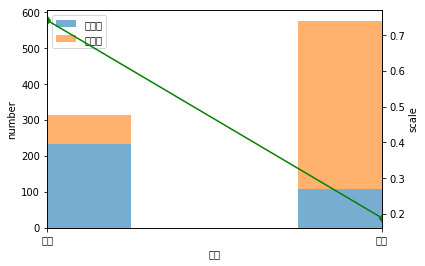

In [73]:
# 可视化 x 轴坐标标签方向
var_rot = 'horizontal'
groups_data_df_t[['幸存者','遇难者']].plot(kind='bar', stacked=True, alpha=0.6)
plt.ylabel("number")
# 幸存者比例折线图
# groups_data_df_t['幸存者比例'].plot(secondary_y=True, kind='line', rot=var_rot)
groups_data_df_t['幸存者比例'].plot(secondary_y=True, kind='line', style='gd-', rot=var_rot)
plt.ylabel("scale")

plt.show()

In [88]:
groups_data = passengers_df.groupby(['船舱等级', '是否幸存']).size()
groups_data_uns = groups_data.unstack()
groups_data_uns

是否幸存,幸存者,遇难者
船舱等级,,
三等舱,119,372
二等舱,87,97
头等舱,136,80


In [82]:
groups_data_uns

是否幸存,幸存者,遇难者,幸存者比例
船舱等级,,,
三等舱,119,372,NaN
二等舱,87,97,NaN
头等舱,136,80,NaN


In [97]:
groups_data_uns.sum(axis=1)

船舱等级
三等舱    491.0
二等舱    184.0
头等舱    216.0
dtype: float64

In [109]:
 groups_data_uns['幸存者']/groups_data_uns.sum(axis=1)

船舱等级
三等舱    0.242363
二等舱    0.472826
头等舱    0.629630
dtype: float64

In [110]:
groups_data_uns.head()

是否幸存,幸存者,遇难者
船舱等级,,
三等舱,119,372
二等舱,87,97
头等舱,136,80


In [111]:
#groups_data_uns.drop(['幸存者比例'],axis=1, inplace=True)
groups_data_uns.insert(2, '幸存者比例', groups_data_uns['幸存者']/groups_data_uns.sum(axis=1))
groups_data_uns

是否幸存,幸存者,遇难者,幸存者比例
船舱等级,,,
三等舱,119,372,0.242363
二等舱,87,97,0.472826
头等舱,136,80,0.629630


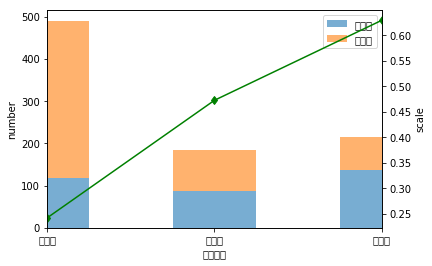

In [114]:
groups_data_uns.columns.name = None  # 为了数据框数据显示明确，这里设为空
# 可视化 x 轴坐标标签方向
var_rot = 'horizontal'
groups_data_uns[['幸存者','遇难者']].plot(kind='bar', stacked=True, alpha=0.6)
plt.ylabel("number")
# 幸存者比例折线图
# groups_data_df_t['幸存者比例'].plot(secondary_y=True, kind='line', rot=var_rot)
groups_data_uns['幸存者比例'].plot(secondary_y=True, kind='line', style='gd-', rot=var_rot)
plt.ylabel("scale")

plt.show()